##Setup

You will need to make a copy of this notebook in your Google Drive before you can edit the homework files. You can do so with **File &rarr; Save a copy in Drive**.

In [4]:
#@title mount your Google Drive
#@markdown Your work will be stored in a folder called `cs285_f2021` by default to prevent Colab instance timeouts from deleting your edits.

import os
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [5]:
#@title set up mount symlink

DRIVE_PATH = '/content/gdrive/My\ Drive/cs285_f2021'
DRIVE_PYTHON_PATH = DRIVE_PATH.replace('\\', '')
if not os.path.exists(DRIVE_PYTHON_PATH):
  %mkdir $DRIVE_PATH

## the space in `My Drive` causes some issues,
## make a symlink to avoid this
SYM_PATH = '/content/cs285_f2021'
if not os.path.exists(SYM_PATH):
  !ln -s $DRIVE_PATH $SYM_PATH

In [ ]:
#@title apt install requirements

#@markdown Run each section with Shift+Enter

#@markdown Double-click on section headers to show code.

!apt update 
!apt install -y --no-install-recommends \
        build-essential \
        curl \
        git \
        gnupg2 \
        make \
        cmake \
        ffmpeg \
        swig \
        libz-dev \
        unzip \
        zlib1g-dev \
        libglfw3 \
        libglfw3-dev \
        libxrandr2 \
        libxinerama-dev \
        libxi6 \
        libxcursor-dev \
        libgl1-mesa-dev \
        libgl1-mesa-glx \
        libglew-dev \
        libosmesa6-dev \
        lsb-release \
        ack-grep \
        patchelf \
        wget \
        xpra \
        xserver-xorg-dev \
        xvfb \
        python-opengl \
        ffmpeg > /dev/null 2>&1

!pip install opencv-python==3.4.0.12

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:13 https://developer.download.nvidia.com/compute/machine-le

In [ ]:
#@title download mujoco

MJC_PATH = '{}/mujoco'.format(SYM_PATH)
if not os.path.exists(MJC_PATH):
  %mkdir $MJC_PATH
%cd $MJC_PATH
if not os.path.exists(os.path.join(MJC_PATH, 'mujoco200')):
  !wget -q https://www.roboti.us/download/mujoco200_linux.zip
  !unzip -q mujoco200_linux.zip
  %mv mujoco200_linux mujoco200
  %rm mujoco200_linux.zip

/content/gdrive/MyDrive/cs285_f2021/mujoco


In [ ]:
#@title update mujoco paths

import os

os.environ['LD_LIBRARY_PATH'] += ':{}/mujoco200/bin'.format(MJC_PATH)
os.environ['MUJOCO_PY_MUJOCO_PATH'] = '{}/mujoco200'.format(MJC_PATH)
os.environ['MUJOCO_PY_MJKEY_PATH'] = '{}/mjkey.txt'.format(MJC_PATH)

## installation on colab does not find *.so files
## in LD_LIBRARY_PATH, copy over manually instead
!cp $MJC_PATH/mujoco200/bin/*.so /usr/lib/x86_64-linux-gnu/

Ensure your `mjkey.txt` is in /content/cs285_f2021/mujoco before this step

In [ ]:
#@title clone and install mujoco-py

%cd $MJC_PATH
if not os.path.exists('mujoco-py'):
  !git clone https://github.com/openai/mujoco-py.git
%cd mujoco-py
%pip install -e .

## cythonize at the first import
import mujoco_py

/content/gdrive/My Drive/cs285_f2021/mujoco
/content/gdrive/My Drive/cs285_f2021/mujoco/mujoco-py
Obtaining file:///content/gdrive/My%20Drive/cs285_f2021/mujoco/mujoco-py
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Attempting uninstall: mujoco-py
    Found existing installation: mujoco-py 2.0.2.13
    Can't uninstall 'mujoco-py'. No files were found to uninstall.
  Running setup.py develop for mujoco-py


In [ ]:
#@title clone homework repo
#@markdown Note that this is the same codebase from homework 1,
#@markdown so you may need to move your old `homework_fall2021`
#@markdown folder in order to clone the repo again.

#@markdown **Don't delete your old work though!**
#@markdown You will need it for this assignment.

%cd $SYM_PATH
!git clone https://github.com/berkeleydeeprlcourse/homework_fall2021.git

%cd homework_fall2021/project_v3
%pip install -r requirements_colab.txt -f https://download.pytorch.org/whl/torch_stable.html
%pip install -e .

/content/gdrive/My Drive/cs285_f2021
fatal: destination path 'homework_fall2021' already exists and is not an empty directory.
/content/gdrive/My Drive/cs285_f2021/homework_fall2021/project_v3
Looking in links: https://download.pytorch.org/whl/torch_stable.html
  Using cached https://download.pytorch.org/whl/cu92/torch-1.5.1%2Bcu92-cp37-cp37m-linux_x86_64.whl (604.8 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0
    Uninstalling torch-1.10.0:
      Successfully uninstalled torch-1.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.8.2 requires torch==1.7.1, but you have torch 1.5.1+cu92 which is incompatible.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.5.1+cu92 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.5.1+cu92 which is incompatible.
gpytorch 1.6

In [ ]:
#@title set up virtual display

from pyvirtualdisplay import Display

display = Display(visible=0, size=(1400, 900))
display.start()

In [ ]:
#@title test virtual display

#@markdown If you see a video of a four-legged ant fumbling about, setup is complete!

import gym
import matplotlib
matplotlib.use('Agg')
from cs285.infrastructure.colab_utils import (
    wrap_env,
    show_video
)

env = wrap_env(gym.make("Ant-v2"))

observation = env.reset()
for i in range(100):
    env.render(mode='rgb_array')
    obs, rew, term, _ = env.step(env.action_space.sample() ) 
    if term:
      break;
            
env.close()
print('Loading video...')
show_video()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.7/dist-packages/tornado/platf

Loading video...


## Editing Code

To edit code, click the folder icon on the left menu. Navigate to the corresponding file (`cs285_f2021/...`). Double click a file to open an editor. There is a timeout of about ~12 hours with Colab while it is active (and less if you close your browser window). We sync your edits to Google Drive so that you won't lose your work in the event of an instance timeout, but you will need to re-mount your Google Drive and re-install packages with every new instance.

## Run Policy Gradients

In [ ]:
!pip3 install torch==1.7.1 torchvision==0.8.2 

  Using cached torch-1.7.1-cp37-cp37m-manylinux1_x86_64.whl (776.8 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.5.1+cu92
    Uninstalling torch-1.5.1+cu92:
      Successfully uninstalled torch-1.5.1+cu92
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.7.1 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.7.1 which is incompatible.
gpytorch 1.6.0 requires torch>=1.9, but you have torch 1.7.1 which is incompatible.


In [ ]:
!conda remove pytorch torchvision -y
!pip uninstall torch -y
!pip uninstall torch -y  # yes twice
!pip3 install torch==1.7.1 torchvision==0.8.2 

/bin/bash: conda: command not found
Found existing installation: torch 1.7.1
Uninstalling torch-1.7.1:
  Successfully uninstalled torch-1.7.1
  Using cached torch-1.7.1-cp37-cp37m-manylinux1_x86_64.whl (776.8 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.7.1 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.7.1 which is incompatible.
gpytorch 1.6.0 requires torch>=1.9, but you have torch 1.7.1 which is incompatible.


In [ ]:
!pwd

/content/gdrive/My Drive/cs285_f2021/homework_fall2021/project_v3


In [ ]:
!pip3 install gpytorch

  Using cached torch-1.10.0-cp37-cp37m-manylinux1_x86_64.whl (881.9 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.7.1
    Uninstalling torch-1.7.1:
      Successfully uninstalled torch-1.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.8.2 requires torch==1.7.1, but you have torch 1.10.0 which is incompatible.


In [ ]:
#@title imports

import os
import time

from cs285.infrastructure.rl_trainer import RL_Trainer
from cs285.agents.mf_agent import MFAgent

%load_ext autoreload
%autoreload 2

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
#@title runtime arguments

class Args:

  def __getitem__(self, key):
    return getattr(self, key)

  def __setitem__(self, key, val):
    setattr(self, key, val)

  def __contains__(self, key):
    return hasattr(self, key)

  env_name = 'CartPole-v0' #@param
  exp_name =  'try0'#@param

  #@markdown main parameters of interest
  n_iter =  50#@param {type: "integer"}

  ## PDF will tell you how to set ep_len
  ## and discount for each environment
  ep_len = 500 #@param {type: "integer"}
  discount = 0.95 #@param {type: "number"}

  reward_to_go = True #@param {type: "boolean"}
  # nn_baseline = False #@param {type: "boolean"}
  use_q_net = True #@param {type: "boolean"}
  k =  5#@param {type: "integer"}
  table_capacity =  2500#@param {type: "integer"}
  # gae_lambda = None #@param {type: "float"}
  dont_standardize_advantages = False #@param {type: "boolean"}

  #@markdown batches and steps
  batch_size =  1000#@param {type: "integer"}
  eval_batch_size = 400 #@param {type: "integer"}

  num_agent_train_steps_per_iter = 1 #@param {type: "integer"}
  learning_rate =   0.1#@param {type: "number"}
  n_table_max = 20

  # q_func = create_lander_q_network



  #@markdown MLP parameters
  n_layers = 2 #@param {type: "integer"}
  size = 64 #@param {type: "integer"}

  #@markdown system
  save_params = False #@param {type: "boolean"}
  no_gpu = False #@param {type: "boolean"}
  which_gpu = 0 #@param {type: "integer"}
  seed = 1 #@param {type: "integer"}
    
  action_noise_std = 0 

  #@markdown logging
  ## default is to not log video so
  ## that logs are small enough to be
  ## uploaded to gradscope
  video_log_freq =  -1#@param {type: "integer"}
  scalar_log_freq =  1#@param {type: "integer"}


args = Args()

## ensure compatibility with hw1 code
args['train_batch_size'] = args['batch_size']

if args['video_log_freq'] > 0:
  import warnings
  warnings.warn(
      '''\nLogging videos will make eventfiles too'''
      '''\nlarge for the autograder. Set video_log_freq = -1'''
      '''\nfor the runs you intend to submit.''')

In [ ]:
#@title create directory for logging
import time
data_path = '''/content/cs285_f2021/''' \
            '''homework_fall2021/project/data'''

if not (os.path.exists(data_path)):
    os.makedirs(data_path)

logdir = args.exp_name + '_' + args.env_name + '_' + time.strftime("%d-%m-%Y_%H-%M-%S")
logdir = os.path.join(data_path, logdir)
args['logdir'] = logdir
if not(os.path.exists(logdir)):
    os.makedirs(logdir)

In [ ]:
## define policy gradient trainer

class PG_Trainer(object):

    def __init__(self, params):

        #####################
        ## SET AGENT PARAMS
        #####################

        computation_graph_args = {
            'n_layers': params['n_layers'],
            'size': params['size'],
            'learning_rate': params['learning_rate'],
            }

        estimate_advantage_args = {
            'gamma': params['discount'],
            'standardize_advantages': not(params['dont_standardize_advantages']),
            'reward_to_go': params['reward_to_go'],
            'use_q_net': params['use_q_net'],
            'k': params['k'],
            'table_capacity': params['table_capacity'],
            # 'nn_baseline': params['nn_baseline'],
        }

        train_args = {
            'num_agent_train_steps_per_iter': params['num_agent_train_steps_per_iter'],
        }

        # print(params)

        agent_params = {**computation_graph_args, **estimate_advantage_args, **train_args, 
                        "n_table_max": params['n_table_max']}

        self.params = params
        self.params['agent_class'] = MFAgent
        self.params['agent_params'] = agent_params
        self.params['batch_size_initial'] = self.params['batch_size']

        ################
        ## RL TRAINER
        ################

        self.rl_trainer = RL_Trainer(self.params)

    def run_training_loop(self):

        self.rl_trainer.run_training_loop(
            self.params['n_iter'],
            collect_policy = self.rl_trainer.agent.actor,
            eval_policy = self.rl_trainer.agent.actor,
            )

In [ ]:
## run training

print(args.logdir)
trainer = PG_Trainer(args)
trainer.run_training_loop()

/content/cs285_f2021/homework_fall2021/project/data/try0_CartPole-v0_15-12-2021_04-22-03
########################
logging outputs to  /content/cs285_f2021/homework_fall2021/project/data/try0_CartPole-v0_15-12-2021_04-22-03
########################
Using GPU id 0


********** Iteration 0 ************



/content/gdrive/My Drive/cs285_f2021/homework_fall2021/project_v3/cs285/infrastructure/rl_trainer.py:58: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
    self.io_loop.start()
  File "/usr/local/


Training agent using sampled data from replay buffer...
input from MLP: torch.Size([1002, 5])
q_t_values.shape: tensor([-0.0007, -0.0009, -0.0005,  ..., -0.0011, -0.0003, -0.0002],
       grad_fn=<MeanBackward1>)
qvals.shape: tensor([14.7296, 14.4522, 14.1602,  ...,  2.8525,  1.9500,  1.0000])
q_t_values: True
qvals: True

Beginning logging procedure...

Eval_AverageReturn : 13.862069129943848
Eval_StdReturn : 5.110666275024414
Eval_MaxReturn : 31.0
Eval_MinReturn : 10.0
Eval_AverageEpLen : 13.862068965517242
Train_AverageReturn : 32.3636360168457
Train_StdReturn : 19.250844955444336
Train_MaxReturn : 72.0
Train_MinReturn : 13.0
Train_AverageEpLen : 32.36363636363637
Train_EnvstepsSoFar : 1068
TimeSinceStart : 31.187360525131226
Training Loss : 164.3155517578125
Initial_DataCollection_AverageReturn : 32.3636360168457
Done logging...




********** Iteration 1 ************


Training agent using sampled data from replay buffer...
input from MLP: torch.Size([1002, 5])
q_t_values.shape: 

In [ ]:
#@markdown You can visualize your runs with tensorboard from within the notebook

## requires tensorflow==2.3.0
%load_ext tensorboard
%tensorboard --logdir /content/cs285_f2021/homework_fall2021/project/data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


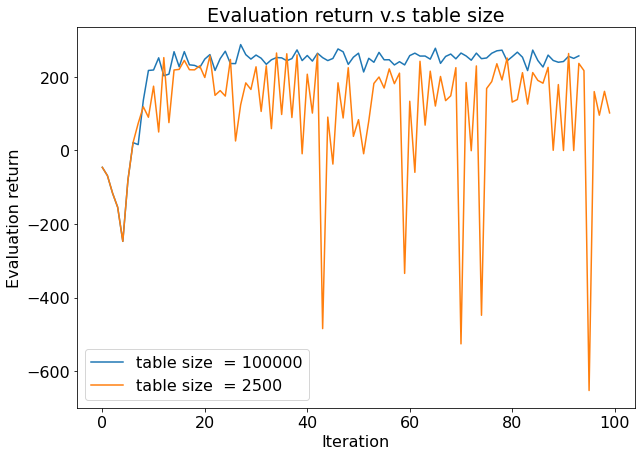

In [39]:
from tensorflow.python.summary.summary_iterator import summary_iterator
import re
import matplotlib.pyplot as plt

def get_avg_return(filepath):
  train_avg = []
  steps = []
  pre = 0
  for e in summary_iterator(filepath):
      if e.step != pre:  
        steps.append(e.step)
      pre = e.step
      for v in e.summary.value:
        if v.tag == "Eval_AverageReturn":
          train_avg.append(v.simple_value)
  return train_avg, steps

# read in files in one directory
REGEX = '_tablecap(.+?)_'
DIR_NAME = "/content/cs285_f2021/homework_fall2021/project_v3/data/0 table size/cheetah/5000"
subdir = [DIR_NAME + "/" + d for d in os.listdir(DIR_NAME)]

filenames = [s + "/" + os.listdir(s)[0] for s in subdir]

returns = []
for f in filenames:
  r = get_avg_return(f)[0]
  returns.append(r)


# extract legend
legend_names = []

for text in filenames:
  k = re.search(REGEX, text).group(1)
  legend_names.append(k)

# legends = ["No standardized", "Standardized"]
plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 16})

plt.xlabel("Iteration")
plt.ylabel("Evaluation return")
plt.title("Evaluation return v.s table size")
for i in range(0, len(returns)):
    y = returns[i]
    x = [i for i in range(len(y))]
    plt.plot(x, y,label = "table size  = " + legend_names[i])
    # plt.plot(x, y,label = legends[i])
plt.legend()
plt.show()